In [29]:
import numpy as np
import pandas as pd
import os

In [112]:
year = 1950

In [113]:
path = '../data/deuxième_partie/la_libre_belgique/'
txts = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f)) and str(year) in f]
 

In [114]:
content_list = []
for txt in txts:
    with open(os.path.join(path, txt), 'r', encoding="utf-8") as f:
        content_list.append(f.read())

In [115]:
temp_path = '../data/deuxième_partie/la_libre_belgique/'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding="utf-8") as f:
    f.write(' '.join(content_list))

In [1]:
#imports
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [53]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "très", "tel", "Brux", 
       "Mod", "mois", "cours", "centre", "lundi", "mardi", "mercredi", "jeudi", "vendredi", 
       "samedi", "dimanche", "jour", "jard", "ref", "etc", "culs", "chez", "mal", "bel",
       "toute", "janvier", "février", "mars", "avril", "mai", "juin", "juillet", "aout", 
       "septembre", "octobre", "novembre", "decembre", "confs", "temps", "francs", "brux",
       "ans", "pet", "pers", "ans", "rue", "tel", "louer", "suite", "ecr", "vente", "leur", 
       "leurs", "jean", "gros", "refer", "orch", "ref", "mme", "quelques", "AOUT", "nord", 
       "midi", "fille", "mme", "app", "soir", "avant", "réf", "déja", "francs", "pres", "rez",
       "vis", "conf", "louis", "louise", "paul", "franc", "meub", "cap", "enf", "conf", 
       "déjà", "ref", "pierre", "ceux", "age", "adr", "semaine", "inst", "bon", "heure", 
       "aven", "sal", "vers", "trav", "mans", "grand", "hui", "elles", "grand", "devant", 
       "voir", "fois", "pris", "celui", "grands", "page",
       ]
sw = set(sw)

In [54]:
year = 1930

In [55]:
#création d'une fonction de 'cleaning'
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}'

In [56]:
path = '../data/deuxième_partie/'
clean_text(year, folder = path)

'Output has been written in ../data/deuxième_partie//1930_clean.txt'

In [57]:
with open(os.path.join(path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()


In [58]:
frequencies = Counter(after.split())
print(frequencies.most_common(30))

[('GOUVERNEMENT', 6284), ('PAYS', 5221), ('PARTI', 4077), ('GUERRE', 3990), ('MINISTRE', 3938), ('POLITIQUE', 3711), ('TRAVAIL', 3407), ('BELGIQUE', 3243), ('SOCIALISTE', 3217), ('PEUPLE', 3194), ('BRUXELLES', 3053), ('PEU', 2629), ('GRANDE', 2607), ('GÉNÉRAL', 2581), ('SOCIALISTES', 2537), ('CONSEIL', 2513), ('MATIN', 2503), ('FRANCE', 2453), ('PREMIER', 2418), ('BELGE', 2402), ('ETAT', 2325), ('HEURES', 2285), ('QUESTION', 2281), ('PRIX', 2240), ('PRÉSIDENT', 2154), ('MILLIONS', 2104), ('PART', 2100), ('MOMENT', 2082), ('POINT', 2016), ('QUAND', 2004)]


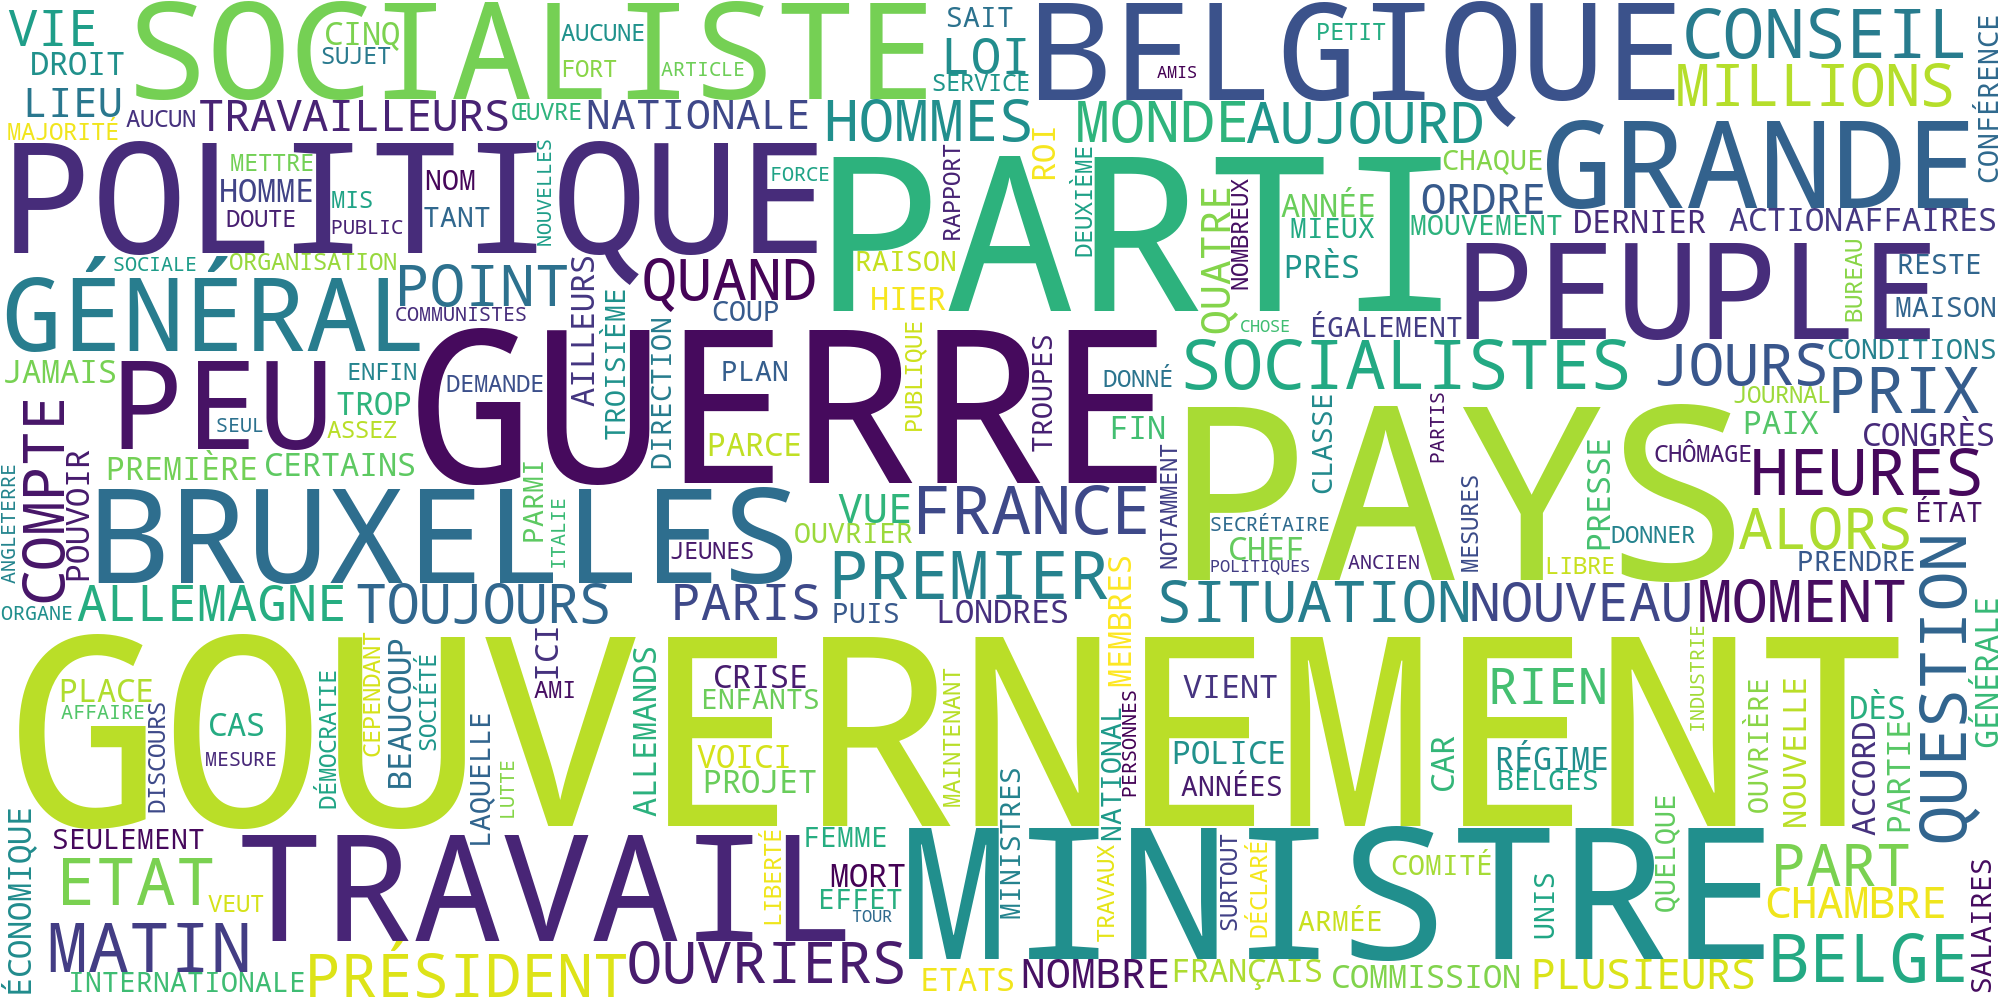

In [59]:
notre_nuage = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
notre_nuage.to_file(os.path.join(path, f"{year}.png"))
Image(filename=os.path.join(path, f"{year}.png"))

In [1]:
#recherche des entités nommées dans notre corpus
#imports
from collections import defaultdict
import sys
import spacy

In [61]:
nlp = spacy.load('fr_core_news_md')

In [63]:
## Charger le texte
n= 100000
text = open("../data/deuxième_partie/1930-LLB.txt", encoding="utf-8").read()[:n]

In [64]:
%%time
# Traiter le texte

doc = nlp(text)

CPU times: total: 8.2 s
Wall time: 8.22 s


In [65]:
#compter les entités nommées 
entités = defaultdict(int)
for ent in doc.ents:
    if ent.label_ == "LOC" or "ORG" or "PER" and len(ent.text) > 3:
        entités[ent.text] += 1


sorted_entités = sorted(entités.items(), key=lambda kv: kv[1], reverse=True)

for entité, freq in sorted_entités[:50]:
    print(f"{entité} apparait {freq} fois dans le corpus")

Bruxelles apparait 13 fois dans le corpus
Rome apparait 13 fois dans le corpus
U apparait 10 fois dans le corpus
I apparait 10 fois dans le corpus
Etat apparait 10 fois dans le corpus
Dieu apparait 9 fois dans le corpus
Belgique apparait 9 fois dans le corpus
Peuple apparait 7 fois dans le corpus
Roi apparait 6 fois dans le corpus
Wallonie apparait 6 fois dans le corpus
Flandre apparait 5 fois dans le corpus
iournal apparait 5 fois dans le corpus
Quirinal apparait 5 fois dans le corpus
Serbes apparait 5 fois dans le corpus
Berlin apparait 5 fois dans le corpus
prince Humbert apparait 4 fois dans le corpus
Italie apparait 4 fois dans le corpus
Reine apparait 4 fois dans le corpus
Katholieke Vlaamsche Landsbond apparait 4 fois dans le corpus
Vatican apparait 4 fois dans le corpus
Yougoslavie apparait 4 fois dans le corpus
Belgrade apparait 4 fois dans le corpus
Constitution apparait 4 fois dans le corpus
II apparait 4 fois dans le corpus
Etats-Unis apparait 4 fois dans le corpus
Pirard a

#analyse de sentiments

In [4]:
#imports
import sys
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer

In [5]:
#création d'une fonction de détection de sentiments
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())

def get_sentiment(input_text):
    blob = tb(input_text)
    polarity, subjectivity = blob.sentiment
    polarity_perc = f"{100*abs(polarity):.0f}"
    subjectivity_perc = f"{100*subjectivity:.0f}"
    if polarity > 0:
        polarity_str = f"{polarity_perc}% positive"
    elif polarity < 0:
        polarity_str = f"{polarity_perc}% negative"
    else:
        polarity_str = "neutral"
    if subjectivity > 0:
        subjectivity_str = f"{subjectivity}% subjective"
    else:
        subjectivity_str = "perfectly objective"
    print(f"This text is {polarity_str} and {subjectivity_str}.")

In [6]:
get_sentiment("Son intérêt est purement botanique, et non industriel, ce qui est inexplicable, puisque le gouvernement vise à développer les plan¬ tations.")

This text is 2% negative and 0.05% subjective.


In [7]:
get_sentiment("Leur attitude provoqua une réaction dans la foule et une bagarre se produisit")

This text is neutral and perfectly objective.


In [8]:
get_sentiment("il importe de noter que le projet Heyman ne remédie en rien aux graves défauts de l'assurance sociale telle qu'elle est pratiquée à l'étranger.")

This text is 15% positive and 0.2333333333333333% subjective.


In [9]:
get_sentiment("La tentative était originale, puisque la maison constituait a la fois un couvent, une salle de rédaction et une librairie sans devanture ni magasin")

This text is 20% positive and 0.6% subjective.


In [10]:
get_sentiment("Ils condamnent sans réserve tout enseignement qui inculquerait aux élèves la hafee ou le mépris de la patrie commune.")

This text is 15% positive and 0.1% subjective.


In [11]:
get_sentiment("Mais comme les provisions nécessaires seront bientôt faites entièrement, on se demande comment les autorités britanniques vont désormais agir.")

This text is 17% positive and 0.1% subjective.


In [12]:
get_sentiment("Il faut que les catholiques aient à leur programme la suppression de la case de tête.")

This text is 10% negative and 0.1% subjective.


In [13]:
get_sentiment("Mais si nous supposons qu'elles atteignent réellement les 500 millions espérés, elles ne feront que compenser les excédents de dépenses ordinaires,")

This text is 5% negative and 0.44999999999999996% subjective.


In [14]:
get_sentiment("Cet après-midi, en rentrant, je remarquai que le vieil orme était complètement défeuillé.")

This text is 5% negative and 0.475% subjective.


In [15]:
get_sentiment("En fait, la totalité des concessions obtenues par l'Angleterre n'est guère égalée par ce qu'elle a donné aux Dominions")

This text is 10% positive and perfectly objective.
